In [1]:
import pandas as pd
from datetime import datetime

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
client_3 = pd.read_csv('Clients/Export/client_3.csv')

In [3]:
# function to clean the data
# drop rows that contain na values
# change the date column do datetime objects
def clean_data(data):
    data = data.dropna()
    data.loc[:,('date')] = pd.to_datetime(data.loc[:,('date')])
    return data

# function to aggregate the data
# group by day and room
# compute all min, max and mean values for all air quality attributes
def aggregate(data):
    df = data.groupby([data['date'].dt.date, "location_uuid"]).agg(
        {
            "t_ambient": [min, max, 'mean'],
            "t_globe": [min, max, 'mean'],
            "hum_ambient": [min, max, 'mean'],
            "hum_globe": [min, max, 'mean'],
            "co2": [min, max, 'mean'],
            "tvoc": [min, max, 'mean'],
            "pm1": [min, max, 'mean'],
            "pm2_5": [min, max, 'mean'],
            "pm10": [min, max, 'mean'],
            "aerosol_small": [min, max, 'mean'],
            "aerosol_large": [min, max, 'mean']
        }
    )
    return df

In [4]:
client_3 = clean_data(client_3)
df_3 = aggregate(client_3)

C:\Users\Dave Laptop\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
df_3.iloc[0]

t_ambient      min      16.850000
               max      21.230000
               mean     20.512214
t_globe        min      18.960000
               max      21.900000
               mean     21.230153
hum_ambient    min      49.490000
               max      62.020000
               mean     51.510687
hum_globe      min      40.980000
               max      47.910000
               mean     42.497023
co2            min     399.420000
               max     633.850000
               mean    413.135344
tvoc           min       0.250000
               max     963.230000
               mean    499.212748
pm1            min       0.350000
               max       3.250000
               mean      1.099160
pm2_5          min       0.380000
               max       3.420000
               mean      1.205344
pm10           min       0.380000
               max       3.430000
               mean      1.284733
aerosol_small  min       0.440000
               max       4.570000
              

In [25]:
# column at index 13 is max co2
x_train = df_3[:400]
y_train = df_3.iloc[1:401, 13]

x_val = df_3[400:458]
y_val = df_3.iloc[401:459, 13]

In [19]:
df_3.iloc[1,13]

486.2180555555555

In [28]:
model = keras.Sequential()
model.add(keras.Input(shape=(33,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)

In [36]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=258,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Epoch 1/258
7/7 [==============================] - 0s 21ms/step - loss: 35469.1523 - accuracy: 0.0000e+00 - val_loss: 35831.1484 - val_accuracy: 0.0000e+00
Epoch 2/258
7/7 [==============================] - 0s 5ms/step - loss: 33741.7188 - accuracy: 0.0000e+00 - val_loss: 36354.4180 - val_accuracy: 0.0000e+00
Epoch 3/258
7/7 [==============================] - 0s 6ms/step - loss: 33239.6406 - accuracy: 0.0000e+00 - val_loss: 36708.5977 - val_accuracy: 0.0000e+00
Epoch 4/258
7/7 [==============================] - 0s 8ms/step - loss: 33186.3789 - accuracy: 0.0000e+00 - val_loss: 35513.0547 - val_accuracy: 0.0000e+00
Epoch 5/258
7/7 [==============================] - 0s 8ms/step - loss: 33193.7070 - accuracy: 0.0000e+00 - val_loss: 35620.5117 - val_accuracy: 0.0000e+00
Epoch 6/258
7/7 [==============================] - 0s 9ms/step - loss: 33569.1094 - accuracy: 0.0000e+00 - val_loss: 36641.6250 - val_accuracy: 0.0000e+00
Epoch 7/258
7/7 [==============================] - 0s 8ms/step - loss

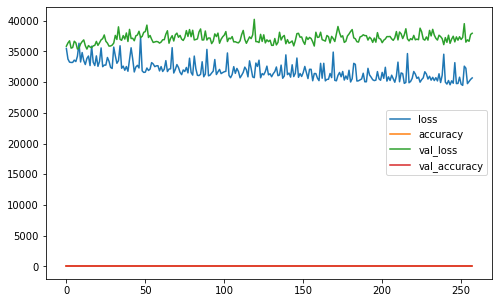

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()